<a href="https://colab.research.google.com/github/Rodrigu87/Module-2-Project-CAS-UniBe/blob/main/Divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MODULE 2 PROJECT**

# The divorce code
*By Kabir, Rodrigue and Sertac*



**Research objectives**

This project aims to advance our understanding of the factors that contribute to divorce.

Specifically, it seeks to:


*   Predict the likelihood of divorce
*  Identify the decisive factors leading to divorce






### Research questions

*   To what extent can demographic, socioeconomic, relational,and psychosocial variables predict the likelihood of divorce among married couples?
*   Which factors are the strongest determinants of divorce in this population?



# **Research hypotheses**

*  H1: Education Level- Individuals with education levels ara assumed to have a lower likekihood of divorce.

*   H2: Employment Status- Stable employment is assumed to reduce the risk of divorce, while unemployment may increase it.

*  H3: Religious Compatibility- Higher religious compatibility between spouses may lower the probability of divorce.

*   H4: Conflict Resolution Style- Constructive conflict resolution styles are assumed to reduce the risk of divorce.

*  H5: Marriage Type- Marriage type( Pre-marital cohabitation, love and arranged marriages)  is assumed to have an influence on the probability of divorce.


In [1]:
# About the dataset
# synthetic dataset from kaggle.com (https://www.kaggle.com/datasets/vanpatangan/divorce-prediction/data)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
url = "https://raw.githubusercontent.com/Rodrigu87/Module-2-Project-CAS-UniBe/main/divorce_df.csv"
df = pd.read_csv(url)
df.head()

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1


In [24]:
# Dataset dimensions (rows, columns)
df.shape

(5000, 22)

In [25]:
# Summary of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_at_marriage            5000 non-null   int64  
 1   marriage_duration_years    5000 non-null   int64  
 2   num_children               5000 non-null   int64  
 3   education_level            5000 non-null   object 
 4   employment_status          5000 non-null   object 
 5   combined_income            5000 non-null   int64  
 6   religious_compatibility    5000 non-null   object 
 7   cultural_background_match  5000 non-null   int64  
 8   communication_score        5000 non-null   float64
 9   conflict_frequency         5000 non-null   int64  
 10  conflict_resolution_style  5000 non-null   object 
 11  financial_stress_level     5000 non-null   float64
 12  mental_health_issues       5000 non-null   int64  
 13  infidelity_occurred        5000 non-null   int64

In [17]:
# Summary of null/missing values in the dataset
df.isnull().sum()

,0
age_at_marriage,0
marriage_duration_years,0
num_children,0
education_level,0
employment_status,0
combined_income,0
religious_compatibility,0
cultural_background_match,0
communication_score,0
conflict_frequency,0


In [21]:
# Data type summary for the dataset
df.dtypes

,0
age_at_marriage,int64
marriage_duration_years,int64
num_children,int64
education_level,object
employment_status,object
combined_income,int64
religious_compatibility,object
cultural_background_match,int64
communication_score,float64
conflict_frequency,int64


In [16]:
# Statistical summary of numeric columns
df.describe()

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.583600,9.171000,1.552800,60220.078400,0.755400,6.040507,2.008000,5.071450,0.203800,0.149000,0.240400,5.966853,2.972600,0.592200,0.050400,6.030525,0.398200
std,4.855978,8.848266,1.247527,19662.080982,0.429893,1.963349,1.412351,2.326322,0.402862,0.356124,0.427369,1.965504,1.711735,0.491475,0.218791,1.932922,0.489576
min,18.000000,1.000000,0.000000,10000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,2.000000,1.000000,46666.000000,1.000000,4.661929,1.000000,3.365562,0.000000,0.000000,0.000000,4.597007,2.000000,0.000000,0.000000,4.702663,0.000000
50%,28.000000,6.000000,1.000000,60196.000000,1.000000,6.058246,2.000000,5.062464,0.000000,0.000000,0.000000,6.010716,3.000000,1.000000,0.000000,6.034343,0.000000
75%,31.000000,13.000000,2.000000,73666.500000,1.000000,7.426862,3.000000,6.717954,0.000000,0.000000,0.000000,7.328916,4.000000,1.000000,0.000000,7.372830,1.000000
max,45.000000,40.000000,6.000000,126909.000000,1.000000,10.000000,9.000000,10.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,10.000000,1.000000


In [27]:
# Count of divorced vs non-divorced individuals
df['divorced'].value_counts(). rename({0: 'Not Divorced', 1: 'Divorced'})

,count
divorced,
Not Divorced,3009
Divorced,1991


In [47]:
# Proportion of divorced vs non-divorced individuals
df['divorced'].value_counts(normalize = True).rename({0: 'Not Divorced', 1: 'Divorced'})*100

,proportion
divorced,
Not Divorced,60.18
Divorced,39.82


In [43]:
# Median marriage duration by divorce status
df.groupby('divorced')['marriage_duration_years'].median()

,marriage_duration_years
divorced,
0,6.0
1,6.0


# Part A. Descriptive statistics on divorces and non-divorced couples


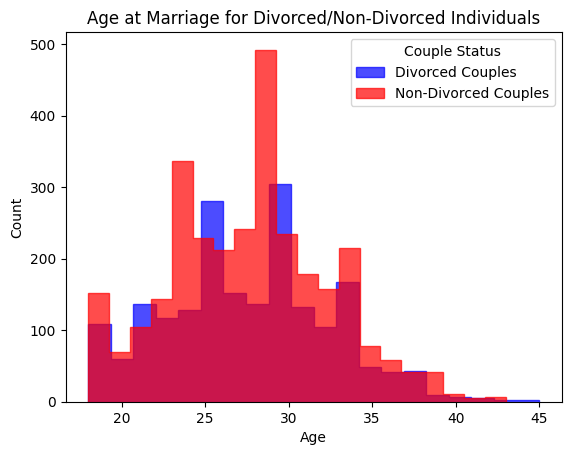

In [12]:
# Descriptive Statistics on Age at Marriage for Divorced and Non-Divorced Individials

# Filter the data to include only divorced individuals
divorced_data = df[df['divorced'] == 1]

#Filter the data to include only Non-divorced individuals
Non_divorced  = df[df['divorced'] == 0]

# Plot the histogram of age at marriage for divorced individuals
divorced_data['age_at_marriage'].plot(kind='hist', fill=True, histtype='step', label = 'Divorced Couples', color='blue', bins=20, alpha=0.7)
Non_divorced['age_at_marriage'].plot(kind = 'hist', fill = True, histtype = 'step', label = 'Non-Divorced Couples', color = 'red', bins = 20, alpha=0.7)
plt.title("Age at Marriage for Divorced/Non-Divorced Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Couple Status')
plt.show()

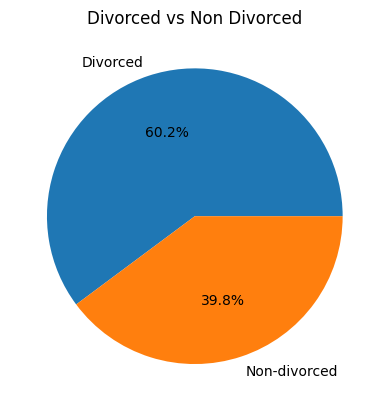

In [5]:
plt.pie(df['divorced'].value_counts(),labels = ['Divorced', 'Non-divorced'], autopct = '%1.1f%%')
plt.title("Divorced vs Non Divorced")
plt.show()

In [6]:
# Separate groups: divorced vs not divorced
divorced_group = df[df["divorced"] == 1]
not_divorced_group = df[df["divorced"] == 0]

# Focus only on the requested columns
selected_cols = ["age_at_marriage", "social_support", "communication_score"]

# Calculate mean and std for divorced vs not divorced
stats_divorced_sel = divorced_group[selected_cols].agg(["mean", "std"]).T
stats_not_divorced_sel = not_divorced_group[selected_cols].agg(["mean", "std"]).T

# Combine into one DataFrame
comparison_selected = pd.concat(
    [stats_divorced_sel, stats_not_divorced_sel],
    axis=0,
    keys=["Divorced", "Not Divorced"]
)

# Show results
comparison_selected

mean       std
Divorced     age_at_marriage      27.628327  4.937955
             social_support        5.885323  1.964805
             communication_score   5.859002  1.964163
Not Divorced age_at_marriage      27.554005  4.801563
             social_support        6.020800  1.964432
             communication_score   6.160605  1.953886



# Part B. inferential statistics
Compare divorced vs non-divorced couples on social_support




===== social_support =====
Shapiro test: p0=0.000, p1=0.000


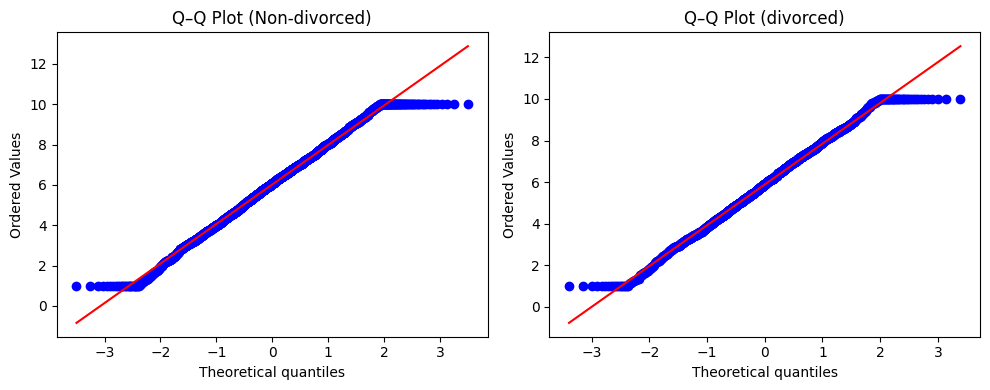

Levene’s test (equal var?): p=0.686


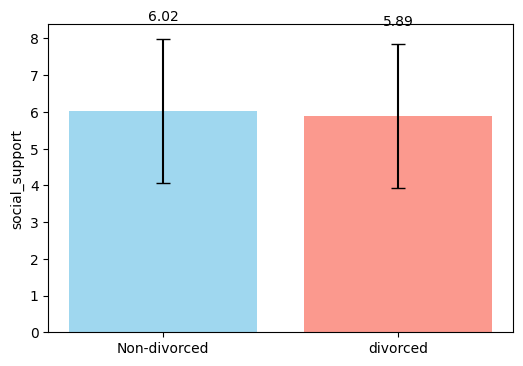

Mann–Whitney U statistic = 3113948.500
p-value = 0.0177


In [7]:
# Variables of interest
group_col = "divorced"
vars_to_test = ["social_support"]

# Hypotheses
#H0 = There is no significant difference in social support between divorced and non-divorced couples
#H1 = Divorced couples and non-divorced couples differ significantly in their level of social support.


# Function to run tests
def compare_groups(df, var, group_col="divorced"):
    print(f"\n===== {var} =====")

    # Split groups
    Non_divorced = df.loc[df[group_col] == 0, var].dropna()
    Divorced = df.loc[df[group_col] == 1, var].dropna()

    # Check normality (Shapiro-Wilk)
    sw_Non_divorced = stats.shapiro(Non_divorced)
    sw_Divorced = stats.shapiro(Divorced)
    print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

    # Side-by-side QQ plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    stats.probplot(Non_divorced, dist="norm", plot=axes[0])
    axes[0].set_title(f"Q–Q Plot (Non-{group_col})")

    stats.probplot(Divorced, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q–Q Plot ({group_col})")

    plt.tight_layout()
    plt.show()

    # Check equal variances (Levene’s test)
    lev = stats.levene(Non_divorced, Divorced)
    print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

    #Barplots
    # 1. Compute group means and stds
    means = [np.mean(Non_divorced), np.mean(Divorced)]
    stds  = [np.std(Non_divorced), np.std(Divorced)]

    # 2. Labels
    groups = [f"Non-{group_col}", group_col]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

    # 4. Labels & title
    ax.set_ylabel(var)

    # 5. Optional: show mean values on top of bars
    for i, v in enumerate(means):
        ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    #Mann Mann–Whitney U Test
    u_stat, p_val = stats.mannwhitneyu(
        Non_divorced, Divorced,
        alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
    )

    print(f"Mann–Whitney U statistic = {u_stat:.3f}")
    print(f"p-value = {p_val:.4f}")


# Run tests for each variable
for var in vars_to_test:
    compare_groups(df, var, group_col)

Compare Divorced VS Non_divorced couples on communication score


===== communication_score =====
Shapiro test: p0=0.000, p1=0.000


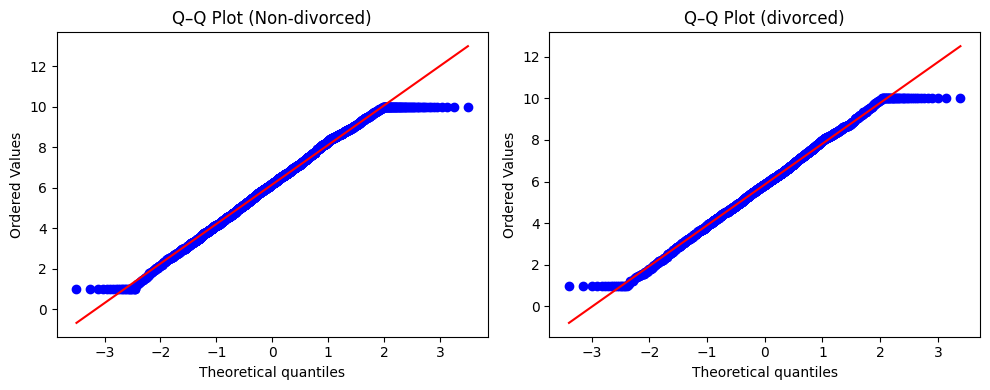

Levene’s test (equal var?): p=0.939


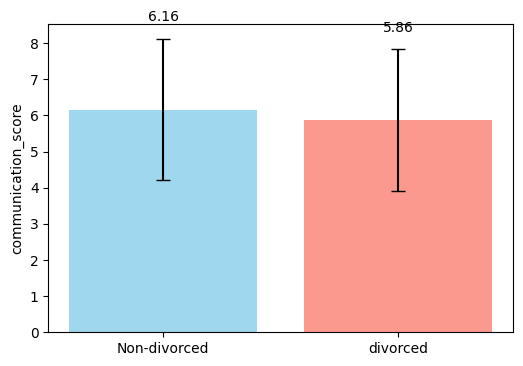

Mann–Whitney U statistic = 3261200.500
p-value = 0.0000


In [8]:
# Variables of interest
group_col = "divorced"
vars_to_test = ["communication_score"]

# Hypotheses
#H0 = There is no significant difference in communication score between divorced and non-divorced couples
#H1 = Divorced couples and non-divorced couples differ significantly in their communication.


# Function to run tests
def compare_groups(df, var, group_col="divorced"):
    print(f"\n===== {var} =====")

    # Split groups
    Non_divorced = df.loc[df[group_col] == 0, var].dropna()
    Divorced = df.loc[df[group_col] == 1, var].dropna()

    # Check normality (Shapiro-Wilk)
    sw_Non_divorced = stats.shapiro(Non_divorced)
    sw_Divorced = stats.shapiro(Divorced)
    print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

    # Side-by-side QQ plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    stats.probplot(Non_divorced, dist="norm", plot=axes[0])
    axes[0].set_title(f"Q–Q Plot (Non-{group_col})")

    stats.probplot(Divorced, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q–Q Plot ({group_col})")

    plt.tight_layout()
    plt.show()

    # Check equal variances (Levene’s test)
    lev = stats.levene(Non_divorced, Divorced)
    print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

    #Barplots
    # 1. Compute group means and stds
    means = [np.mean(Non_divorced), np.mean(Divorced)]
    stds  = [np.std(Non_divorced), np.std(Divorced)]

    # 2. Labels
    groups = [f"Non-{group_col}", group_col]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

    # 4. Labels & title
    ax.set_ylabel(var)

    # 5. Optional: show mean values on top of bars
    for i, v in enumerate(means):
        ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    #Mann Mann–Whitney U Test
    u_stat, p_val = stats.mannwhitneyu(
        Non_divorced, Divorced,
        alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
    )

    print(f"Mann–Whitney U statistic = {u_stat:.3f}")
    print(f"p-value = {p_val:.4f}")


# Run tests for each variable
for var in vars_to_test:
    compare_groups(df, var, group_col)

Compare Divorced VS Non_divorced couples on financial stress


===== financial_stress_level =====
Shapiro test: p0=0.000, p1=0.000


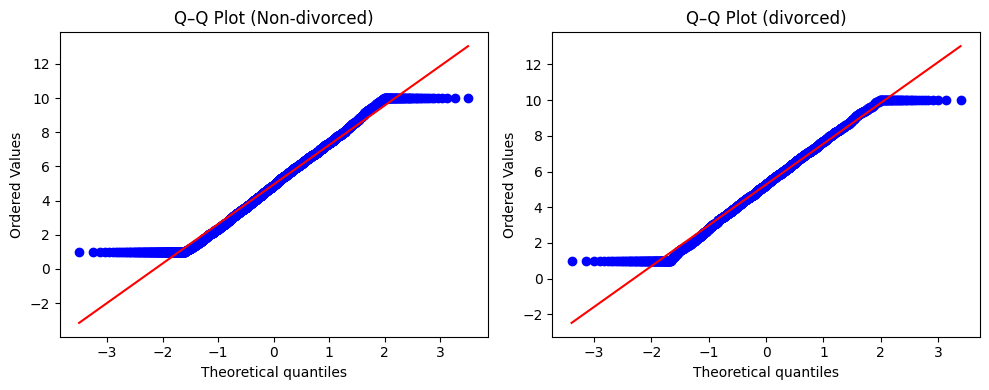

Levene’s test (equal var?): p=0.279


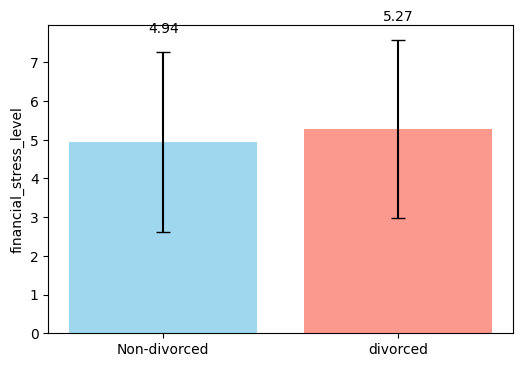

Mann–Whitney U statistic = 2743363.000
p-value = 0.0000


In [9]:
# Variables of interest
group_col = "divorced"
vars_to_test = ["financial_stress_level"]

# Hypotheses
#H0 = There is no significant difference in communication score between divorced and non-divorced couples
#H1 = Divorced couples and non-divorced couples differ significantly in their communication.


# Function to run tests
def compare_groups(df, var, group_col="divorced"):
    print(f"\n===== {var} =====")

    # Split groups
    Non_divorced = df.loc[df[group_col] == 0, var].dropna()
    Divorced = df.loc[df[group_col] == 1, var].dropna()

    # Check normality (Shapiro-Wilk)
    sw_Non_divorced = stats.shapiro(Non_divorced)
    sw_Divorced = stats.shapiro(Divorced)
    print(f"Shapiro test: p0={sw_Non_divorced.pvalue:.3f}, p1={sw_Divorced.pvalue:.3f}")

    # Side-by-side QQ plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    stats.probplot(Non_divorced, dist="norm", plot=axes[0])
    axes[0].set_title(f"Q–Q Plot (Non-{group_col})")

    stats.probplot(Divorced, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q–Q Plot ({group_col})")

    plt.tight_layout()
    plt.show()

    # Check equal variances (Levene’s test)
    lev = stats.levene(Non_divorced, Divorced)
    print(f"Levene’s test (equal var?): p={lev.pvalue:.3f}")

    #Barplots
    # 1. Compute group means and stds
    means = [np.mean(Non_divorced), np.mean(Divorced)]
    stds  = [np.std(Non_divorced), np.std(Divorced)]

    # 2. Labels
    groups = [f"Non-{group_col}", group_col]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(groups, means, yerr=stds, capsize=5, color=["skyblue","salmon"], alpha=0.8)

    # 4. Labels & title
    ax.set_ylabel(var)

    # 5. Optional: show mean values on top of bars
    for i, v in enumerate(means):
        ax.text(i, v + stds[i] + 0.5, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    #Mann Mann–Whitney U Test
    u_stat, p_val = stats.mannwhitneyu(
        Non_divorced, Divorced,
        alternative='two-sided'   # can be 'two-sided', 'less', or 'greater'
    )

    print(f"Mann–Whitney U statistic = {u_stat:.3f}")
    print(f"p-value = {p_val:.4f}")


# Run tests for each variable
for var in vars_to_test:
    compare_groups(df, var, group_col)